In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Conditional on 1 Signal

In [62]:
mu_v = 0
sig_v = 3

mu_e = 0
sig_e = 0.5

v = np.random.normal(mu_v, sig_v, 10000)
e = np.random.normal(mu_e, sig_e, (10000, 10000))

In [63]:
s = e + v
s[:5]

array([[5.48572129, 3.8655301 , 6.97127326, ..., 4.50169346, 2.17113275,
        4.24226013],
       [5.55049626, 2.88895765, 7.17875561, ..., 3.61522548, 1.27599298,
        4.70935493],
       [4.96195349, 3.07395633, 6.75581701, ..., 4.34065315, 2.00175311,
        4.69095741],
       [5.12298325, 3.00952575, 6.31033309, ..., 4.02080659, 1.26045502,
        4.08269307],
       [5.39130254, 2.36632288, 6.61926267, ..., 3.61200961, 1.40259674,
        4.59690786]])

In [64]:
v[:5]  # True value
e[1][:5]  # Noises
s[1][:5]  # All signals

array([ 5.26795651,  3.19431597,  6.50515542,  2.24762962, -7.34233348])

array([ 0.28253976, -0.30535832,  0.67360018,  0.06769742, -0.22942141])

array([ 5.55049626,  2.88895765,  7.17875561,  2.31532704, -7.57175488])

In [65]:
# s = np.array([[0.01, 0.04, 0.05, 0.051, 0.06]])
# np.where(np.logical_and(s >= t - 0.001, s <= t + 0.001))

In [66]:
t = 0.5  # Observed signal
u = 0.001

# Backout all possible true values
# len(np.where(np.logical_and(s >= t - u, s <= t + u))[1])
v_dist = v[np.where(np.logical_and(s >= t - u, s <= t + u))[1]]
len(v_dist)

26184

In [67]:
np.mean(v_dist)  # Simulate first moment
np.std(v_dist) ** 2  # Simulate second moment

0.4872231365840175

0.23724644531367114

In [68]:
mu_v_t = mu_v + (t - mu_v - mu_e) * (sig_v ** 2) / (sig_v ** 2 + sig_e ** 2)  # Derived first moment
sig_v_t = (sig_e ** 2 * sig_v ** 2) / (sig_v ** 2 + sig_e ** 2)  # Derived second moment

mu_v_t
sig_v_t

0.4864864864864865

0.24324324324324326

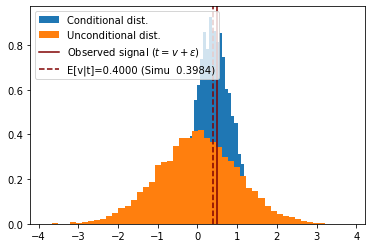

In [90]:
def plot(t=0.5, v=(0, 1), e=(0, 0.5), u=0.001):
    
    mu_v, sig_v = v
    mu_e, sig_e = e

    v = np.random.normal(mu_v, sig_v, 10000)
    e = np.random.normal(mu_e, sig_e, (10000, 10000))
    s = v + e
    
    v_dist = v[np.where(np.logical_and(s >= t - u, s <= t + u))[1]]
    
    mu_v_t = mu_v + (t - mu_v - mu_e) * (sig_v ** 2) / (sig_v ** 2 + sig_e ** 2)  # Derived first moment

    plt.hist(v_dist, density=True, bins=50, label='Conditional dist.')
    plt.hist(v, density=True, bins=50, label='Unconditional dist.')
    plt.axvline(t, c='maroon', label='Observed signal ($t=v+\epsilon$)')
    plt.axvline(mu_v_t, c='maroon', ls='--', label=f'E[v|t]={mu_v_t:.4f} (Simu {np.mean(v_dist): .4f})')
    plt.legend()
    
    plt.show()
    
plot()

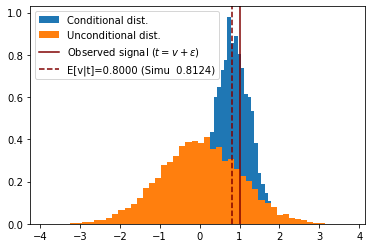

In [91]:
plot(t=1, v=(0, 1), e=(0, 0.5))  # The discount rate on signal is fixed by the beta=Cov(v,t)/Var(v)

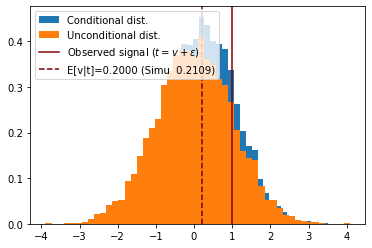

In [92]:
plot(t=1, v=(0, 1), e=(0, 2))  # When noise is large (sig_e), the information given by signal is trivial.

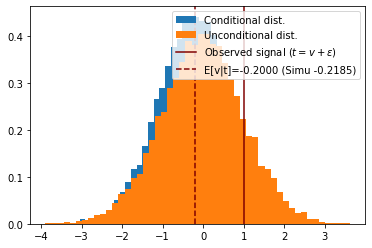

In [93]:
plot(t=1, v=(0, 1), e=(2, 2))  # When noise persistently enlarge the signal, the conditional expectation should be actually quite small.

# Conditional on 2 Signals

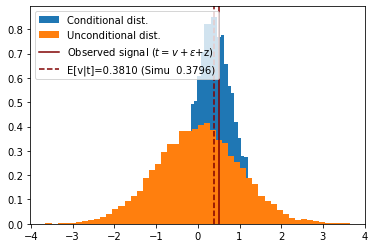

In [94]:
def plot(t=0.5, v=(0, 1), e=(0, 0.5), z=(0, 0.25), u=0.001):
    
    mu_v, sig_v = v
    mu_e, sig_e = e
    mu_z, sig_z = z

    v = np.random.normal(mu_v, sig_v, 10000)
    e = np.random.normal(mu_e, sig_e, (10000, 10000))
    z = np.random.normal(mu_z, sig_z, (10000, 10000))
    s = v + e + z
    
    v_dist = v[np.where(np.logical_and(s >= t - u, s <= t + u))[1]]
    
    mu_v_t = mu_v + (t - mu_v - mu_e - mu_z) * (sig_v ** 2) / (sig_v ** 2 + sig_e ** 2 + sig_z ** 2)  # Derived first moment

    plt.hist(v_dist, density=True, bins=50, label='Conditional dist.')
    plt.hist(v, density=True, bins=50, label='Unconditional dist.')
    plt.axvline(t, c='maroon', label='Observed signal ($t=v+\epsilon$+z)')
    plt.axvline(mu_v_t, c='maroon', ls='--', label=f'E[v|t]={mu_v_t:.4f} (Simu {np.mean(v_dist): .4f})')
    plt.legend()
    
    plt.show()
    
plot()

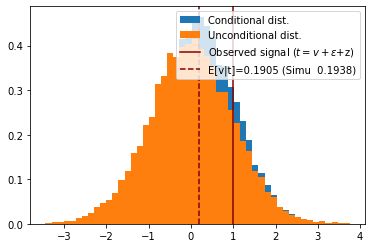

In [95]:
plot(t=1, v=(0, 1), e=(0, 0.5), z=(0, 2))  # When noise is large (sig_e), the information given by signal is trivial.